In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Set styles for plots
sns.set(style="whitegrid")





In [3]:
file_path = '../diabetes_012_health_indicators_BRFSS2021.csv'
diabetes_data = pd.read_csv(file_path)


In [4]:
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


C:\Users\prane\AppData\Local\Temp\ipykernel_18796\2293451647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=diabetes_data, palette='coolwarm')


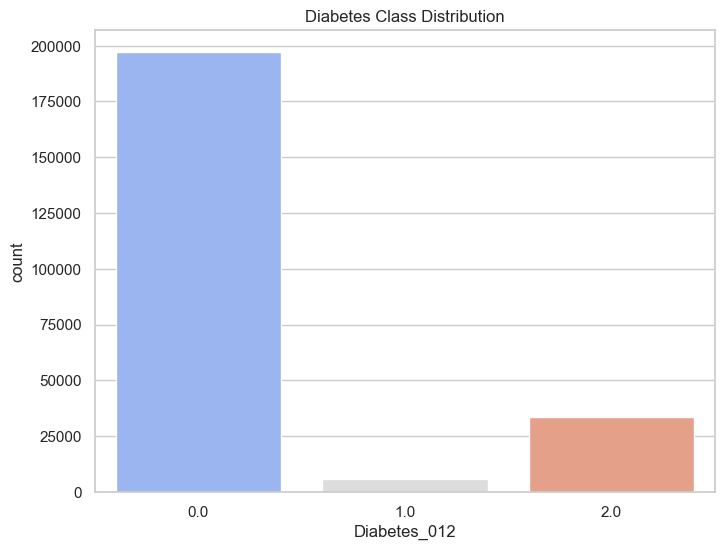

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=diabetes_data, palette='coolwarm')
plt.title("Diabetes Class Distribution")
plt.show()

In [5]:
diabetes_data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
# Feature selection
X = diabetes_data.drop(columns=['Diabetes_012'])
y = diabetes_data['Diabetes_012']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Save model
    with open(f'{model_name}.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    return accuracy


In [8]:
# Train models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}


Decision Tree Accuracy: 0.7537
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     39508
         1.0       0.04      0.05      0.04      1079
         2.0       0.29      0.31      0.30      6689

    accuracy                           0.75     47276
   macro avg       0.40      0.40      0.40     47276
weighted avg       0.77      0.75      0.76     47276



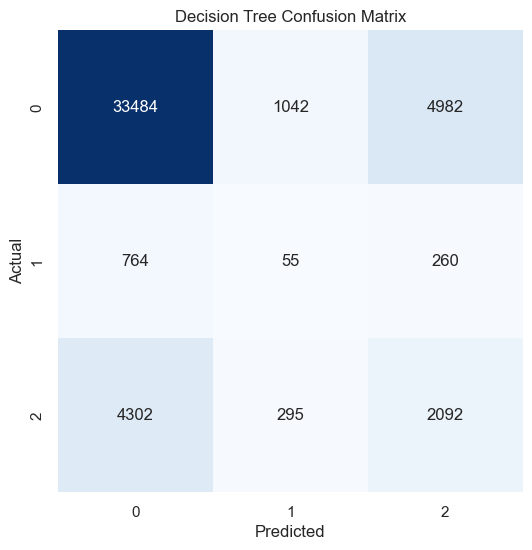

Random Forest Accuracy: 0.8338
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     39508
         1.0       0.04      0.00      0.00      1079
         2.0       0.47      0.19      0.27      6689

    accuracy                           0.83     47276
   macro avg       0.46      0.39      0.39     47276
weighted avg       0.78      0.83      0.80     47276



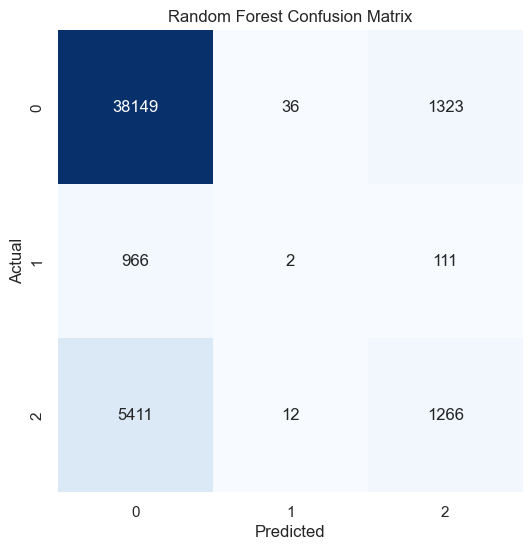

Gradient Boosting Accuracy: 0.8422
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39508
         1.0       0.00      0.00      0.00      1079
         2.0       0.55      0.18      0.27      6689

    accuracy                           0.84     47276
   macro avg       0.47      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

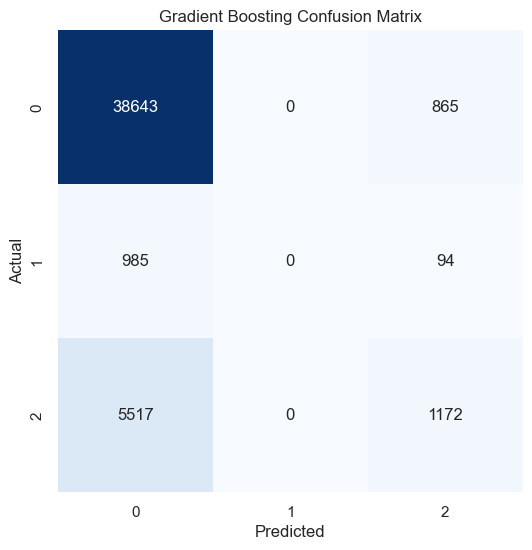

Logistic Regression Accuracy: 0.8399
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39508
         1.0       0.00      0.00      0.00      1079
         2.0       0.53      0.17      0.26      6689

    accuracy                           0.84     47276
   macro avg       0.46      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p

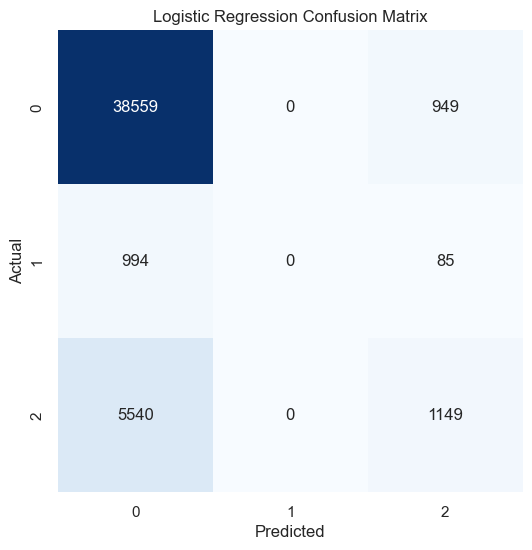

Naive Bayes Accuracy: 0.7512
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85     39508
         1.0       0.05      0.02      0.03      1079
         2.0       0.33      0.58      0.42      6689

    accuracy                           0.75     47276
   macro avg       0.43      0.47      0.43     47276
weighted avg       0.80      0.75      0.77     47276



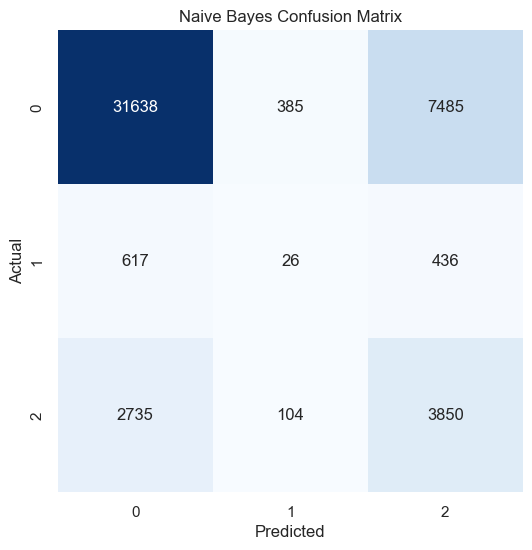

In [9]:

accuracy_scores = {}
for name, model in models.items():
    accuracy_scores[name] = train_and_evaluate_model(model, name)


In [10]:
ann_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ann_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate ANN
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)
accuracy_scores['ANN'] = accuracy_score(y_test, y_pred_ann)

# Save ANN model
ann_model.save('ANN_model.h5')

# Final accuracy scores
accuracy_scores

c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8145 - loss: 0.5750 - val_accuracy: 0.8377 - val_loss: 0.4397
Epoch 2/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8370 - loss: 0.4412 - val_accuracy: 0.8396 - val_loss: 0.4322
Epoch 3/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8357 - loss: 0.4378 - val_accuracy: 0.8409 - val_loss: 0.4289
Epoch 4/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8386 - loss: 0.4295 - val_accuracy: 0.8408 - val_loss: 0.4292
Epoch 5/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8395 - loss: 0.4282 - val_accuracy: 0.8401 - val_loss: 0.4284
Epoch 6/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8400 - loss: 0.4289 - val_accuracy: 0.8413 - val_loss: 0.4272
Epoch 7/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8383 - loss: 0.4290 - val_accuracy: 0.8396 - val_loss: 0.4322
Epoch 8/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8386 - loss: 0.4

{'Decision Tree': 0.7536805144259243,
 'Random Forest': 0.8337634317624164,
 'Gradient Boosting': 0.8421820797021745,
 'Logistic Regression': 0.8399187748540485,
 'Naive Bayes': 0.7512056857602166,
 'ANN': 0.8410398510872324}

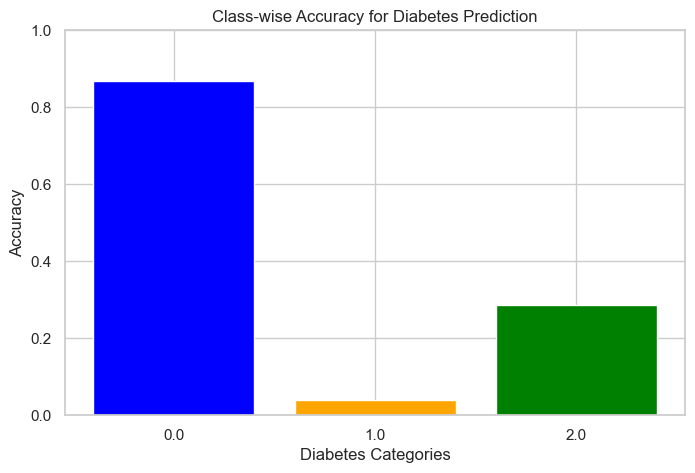

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load the trained model
with open("Decision_Tree.pkl", "rb") as file:
    model = pickle.load(file)

  # Example - ensure you have saved y_test.npy

# Make predictions
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracy per class
class_labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
accuracies = [report[label]['precision'] for label in class_labels]  # Use precision as accuracy per class

# Plot accuracies
plt.figure(figsize=(8, 5))
plt.bar(class_labels, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel("Diabetes Categories")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy for Diabetes Prediction")
plt.ylim(0, 1)  # Accuracy range is 0 to 1
plt.show()
